<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [2]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy
import seaborn

In [50]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [6]:
dataset = pandas.read_csv('violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [7]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [8]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [26]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

### Sol Ejercicio 1a

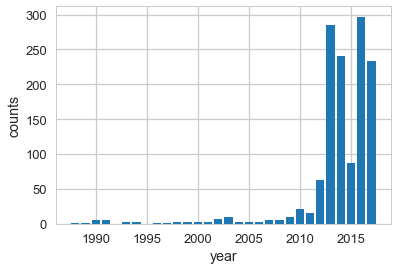

<class 'pandas.core.series.Series'>


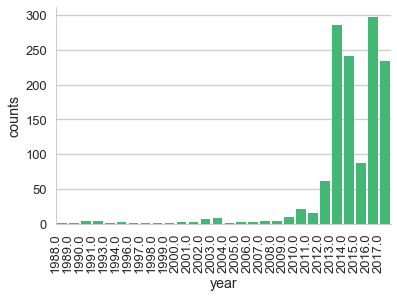

In [27]:
## Sol Ejercicio 1a
# Tenemos que contar para cada año la cantidad de eventos. Aprovechamos el ejemplo
yc=dataset.year.value_counts();
# Probemos un grafico simple usando matplotlib
plt.bar(yc.index,yc.values)
plt.xlabel('year');plt.ylabel('counts')
plt.show()
# Veamos que tipo de dato es yc y lo ploteamos usando seaborn 
print(type(yc))
# Es un tipo Series de pandas, seaborn entiende dataframes y series pero seguimos el ejemplo.
ax = seaborn.barplot(data=yc.to_frame().reset_index(),
    x='index', y='year', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_xlabel('year');ax.set_ylabel('counts')
seaborn.despine()
# Comentario: el correspondiente a matplotlib, parece mas claro en el sentido que preserva los nan (no los incluye,
# pero deja el espacio correspondiente en el grafico, mientras que el correspondiente a seaborn, con la configuracion
# default, parece quitarlos...)

### Solucion Ejercicio 1b/1c

In [28]:
#La tabla es similar a lo anterior pero tenemos que normalizar
ycnorm=dataset.year.value_counts(normalize=True) # por default dropnan=True!
ycpd=ycnorm.to_frame().reset_index().sort_values(['index'])
ycpd.reset_index(inplace=True,drop=True)
ycpd.columns=['year','pFreq']
#
ycpd.reset_index(drop=True,inplace=True)
ycpd

,year,pFreq
0,1988.0,0.000760
1,1989.0,0.000760
2,1990.0,0.003799
3,1991.0,0.003799
4,1993.0,0.001520
5,1994.0,0.002280
6,1996.0,0.000760
7,1997.0,0.000760
8,1998.0,0.001520
9,1999.0,0.001520


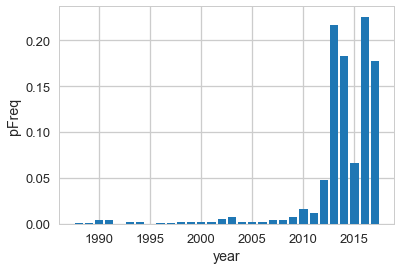

In [29]:
# Graficamos usando matplotlib
plt.bar(ycpd.year,ycpd.pFreq)
plt.xlabel('year');plt.ylabel('pFreq')
plt.show()

* ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

*Ambos graficos son similares pero NO iguales. Los dos tienen su utilidad dependiendo del dato que quiera entregar. Si deseo tener un rapido pantallazo de la cantidad absoluta de eventos de un dado año recurriria al primero de los graficos el cual muestra cantidad de cuentas. En el caso de que quiera obtener la contribucion relativa recurriria al segundo.*

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

*Si suponemos que la recoleccion de la informacion se efectuó de la misma manera y por los mismos organismos en todos los años mencionados, podriamos elaborar alguna clase de analisis. Caso contrario estariamos sacando conclusiones de intervalos temporales que no tuvieron el mismo tratamiento. Esto en realidad lo podriamos analizar usando el mismo dataset y contabilizando la cantidad de entidades en una dada fecha.
Pero dado el supuesto anterior la distribucion al menos en el intervalo (asimetrico) mostrado parece bimodal.
La cantidad de casos de violencia parecen haberse incrementado en los ultimos años, esto puede verse en cualquiera de los graficos elaborados, pero es mas notorio en el caso de magnitudes absolutas/cuentas.
Esto lo podemos observar tambien en el grafico siguiente:*

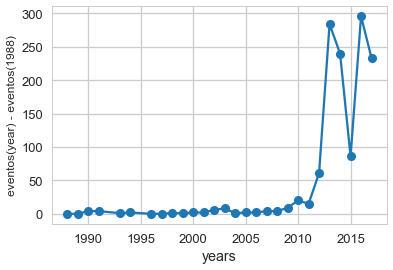

In [30]:
# yc contenia los valores de cuentas y años 
yc_ordered=yc.to_frame().reset_index().sort_values(['index'])
yc_ordered.columns=['year','counts']
yc_ordered.reset_index(inplace=True,drop=True)
plt.figure
plt.plot(yc_ordered.year.values[:],yc_ordered.counts.values[:]-yc_ordered.counts.values[0],'-o')
plt.xlabel('years'); plt.ylabel('eventos(year) - eventos(1988)',fontsize=12)
plt.show()
# En la grafica utilizamos como linea base el primer año 1988, respecto a esto podemos ver que la cantidad de eventos
# se ha incrementado respecto al comienzo de la medicion. 

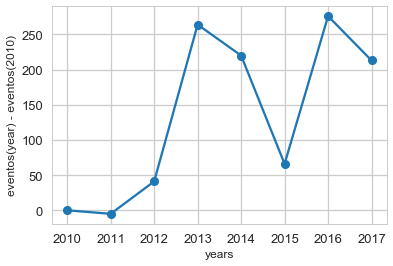

In [31]:
#Sinos concentramos respecto al 2010 por ejemplo
plt.figure
plt.plot(yc_ordered.year.values[20:],yc_ordered.counts.values[20:]-yc_ordered.counts.values[20],'-o')
plt.xlabel('years',fontsize=12); plt.ylabel('eventos(year) - eventos(2010)',fontsize=12)
plt.show()
# En la ultima grafica observamos en forma mas notoria el incremento

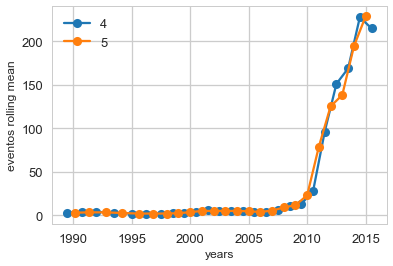

In [32]:
# Una forma alternativa de observar el incremento es utilizar un moving average
plt.figure
for x in range(4,6):
    plt.plot(yc_ordered.rolling(x).mean().year,yc_ordered.rolling(x).mean().counts,'-o')
plt.legend(range(4,6))
plt.xlabel('years',fontsize=12); plt.ylabel('eventos rolling mean',fontsize=12)
plt.show()
yc_ordered.columns=['year','eventos']
# Figura en la cual se ve (con una estructura similar a las anteriores) un notorio incremento. 

In [33]:
# Esto se ve igualmente en el dataset en formato tabla para un lustro por ejemplo
yc_ordered.rolling(5).mean()

,year,eventos
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,1990.2,2.8
5,1991.4,3.2
6,1992.8,3.2
7,1994.2,2.4
8,1995.6,1.8
9,1996.8,1.8


* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

      year     pFreq  pFreqCumSum
0   1988.0  0.000760     0.000760
1   1989.0  0.000760     0.001520
2   1990.0  0.003799     0.005319
3   1991.0  0.003799     0.009119
4   1993.0  0.001520     0.010638
5   1994.0  0.002280     0.012918
6   1996.0  0.000760     0.013678
7   1997.0  0.000760     0.014438
8   1998.0  0.001520     0.015957
9   1999.0  0.001520     0.017477
10  2000.0  0.002280     0.019757
11  2001.0  0.002280     0.022036
12  2002.0  0.005319     0.027356
13  2003.0  0.006839     0.034195
14  2004.0  0.001520     0.035714
15  2005.0  0.002280     0.037994
16  2006.0  0.002280     0.040274
17  2007.0  0.003799     0.044073
18  2008.0  0.003799     0.047872
19  2009.0  0.007599     0.055471
20  2010.0  0.015957     0.071429
21  2011.0  0.012158     0.083587
22  2012.0  0.047112     0.130699
23  2013.0  0.216565     0.347264
24  2014.0  0.183131     0.530395
25  2015.0  0.066109     0.596505
26  2016.0  0.225684     0.822188
27  2017.0  0.177812     1.000000


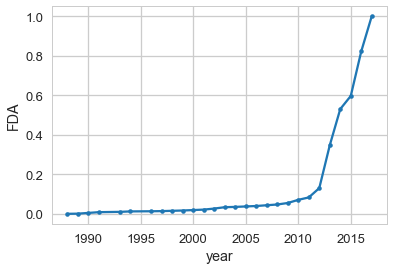

P(acto de violencia antes del cambio de gobierno):  0.596505
Esto es lo mismo que la FDA(2015): 0.596505



In [34]:
# La funcion de distribucion acumulada la calculamos en terminos de la pdf que ya habiamos utilizado y la dejamos 
# disponible en el data frame
ycpd['pFreqCumSum']=ycpd.pFreq.cumsum();
print(ycpd)
# Grafiquemos
plt.figure
plt.plot(ycpd.year,ycpd.pFreqCumSum,'.-')
plt.xlabel('year');plt.ylabel('FDA')
plt.show()
# La propabilidad de que se haya dado un acto de violencia antes del ultimo cambio de gobierno es lo mismo que 1-P(year>2015). Suponemos que el cambio
# se dio en 2016 puesto que no tenemos la discretizacion en terminos de meses
pAC=1-ycpd.pFreq[ycpd.year>2015].sum();
pACstr= 'P(acto de violencia antes del cambio de gobierno):  %f' % pAC 
print(pACstr)
fdastr='Esto es lo mismo que la FDA(2015): %f\n' % ycpd.pFreqCumSum[ycpd.year==2015].values
print(fdastr)

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [35]:
# de https://stackoverflow.com/questions/37926248/how-to-remove-accents-from-values-in-columns
dataset['provincia']=dataset['provincia'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# Cuentas Abolutas
yenc=dataset.provincia.value_counts()
# Valores Normalizados
ypnorm=dataset.provincia.value_counts(normalize=True)
# Acomodamos el Data Frame
yppd=ypnorm.to_frame().reset_index().sort_values(['index'])
yppd.reset_index(inplace=True,drop=True)
yppd.columns=['provincia','pFreq']
yppd

,provincia,pFreq
0,Buenos Aires,0.693182
1,Catamarca,0.001420
2,Chaco,0.020597
3,Chubut,0.026278
4,Ciudad de Buenos Aires,0.083097
5,Cordoba,0.036932
6,Corrientes,0.003551
7,Entre Rios,0.006392
8,Formosa,0.007102
9,Jujuy,0.006392


* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?

*Seria conveniente normalizar las cuentas en funcion del tamaño de la poblacion de cada provincia. Asimismo se podria incorporar la evolución temporal.*

* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

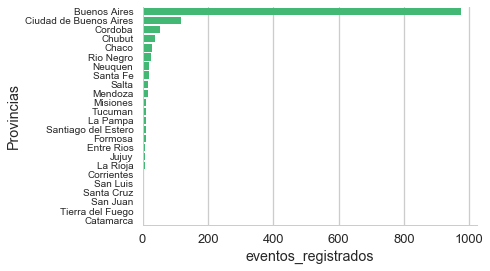

In [36]:
ax = seaborn.barplot(data=yenc.to_frame().reset_index(),
    x='provincia', y='index', color='#2ecc71')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right",fontsize=10)
ax.set_xlabel('eventos_registrados');ax.set_ylabel('Provincias')
seaborn.despine()

*Alternativamente se podria utilizar un estilo de heatmap geolocalizado. Es decir en el mapa de Argentina, ubicar cada provincia y utilizar un heatmap para tonalizarlo.*

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


### Sol Ejercicio 3a

In [37]:
# Antes de armar la tabla revisemos la consistencia de los datos.
print('Cantidad de eventos  (Y=provincia) con NaN: '+ str(sum(dataset.provincia.value_counts(dropna=False))))
print('Cantidad de eventos (X=año) con NaN: ' + str(sum(dataset.year.value_counts(dropna=False))))
print('Cantidad de eventos  (Y=provincia) quitando NaN: '+ str(sum(dataset.provincia.value_counts(dropna=True))))
print('Cantidad de eventos (X=año) quitando NaN: ' + str(sum(dataset.year.value_counts(dropna=True))))


Cantidad de eventos  (Y=provincia) con NaN: 1439
Cantidad de eventos (X=año) con NaN: 1439
Cantidad de eventos  (Y=provincia) quitando NaN: 1408
Cantidad de eventos (X=año) quitando NaN: 1316


*En esta instancia tenemos un par de opciones. Realizamos el filtrado de años y provincias de tal forma de eliminar aquellas instancias donde existan nan en alguna de las dos condiciones o en ambas. Es decir si tenemos casos (year,provincia), eliminamos aquellos (year,nan),(nan,provincia),(nan,nan). O simplemente utilizamos el conjunto total de datos y llevamos la informacion de los nan a cuestas.
Si tuvieramos datos completos esperariamos ver que las distribuciones marginales sean identicas, pero esto en la condicion actual puede no ocurrir puesto que cuando las tratatmos en el ejercicio 1 por ejemplo un par (year,nan) hubiera sido aceptado, pero en el ejercicio 2 no hubiera sido considerada igualmente para el caso inverso (nan, provincia).*

In [9]:
pList=list(set(dataset.provincia.values))
auxDict={};
for i in range(0,len(pList)):
    ycnorm=dataset.year[dataset.provincia==pList[i]].value_counts(dropna=False)
    ycpd2=ycnorm.to_frame()
    auxDict[pList[i]]=ycpd2
    ypd=pandas.concat(auxDict.values(),axis=1)
ypd.columns=pList[:]
ypdSum=sum(ypd.sum())
ypdNew=pandas.DataFrame(data=ypd.values/ypdSum,columns=pList[:],index=ypd.index)

In [10]:
# Veamos las distribuciones marginales para provincias, suma sobre años
ypdNew.sum(axis=0) # Debe ser similar a la calculada en el Ejercicio 2

NaN                       0.000000
San Juan                  0.002131
Chaco                     0.020597
Mendoza                   0.012074
Chubut                    0.026278
San Luis                  0.002841
Neuquen                   0.014915
Misiones                  0.007812
Rio Negro                 0.003551
Formosa                   0.007102
Corrientes                0.019176
Buenos Aires              0.693182
Santa Cruz                0.002841
Tierra del Fuego          0.001420
Córdoba                   0.036932
Santiago del Estero       0.007102
La Pampa                  0.007102
Tucuman                   0.007102
Entre Rios                0.006392
Ciudad de Buenos Aires    0.083097
Jujuy                     0.006392
Santa Fe                  0.014205
Salta                     0.012074
La Rioja                  0.004261
Catamarca                 0.001420
dtype: float64

*Para el caso de suma sobre años parecen similare (esto se refuerza en que la suma sobre NaN=0)*

In [11]:
# Veamos las distribuciones marginales para años, suma sobre provincias
ypdNew.sum(axis=1) # Debe ser similar a la calculada en el Ejercicio 1

 1988.0    0.000710
 1989.0    0.000710
 1990.0    0.003551
 1991.0    0.003551
 1993.0    0.001420
 1994.0    0.002131
 1996.0    0.000710
 1997.0    0.000710
 1998.0    0.001420
 1999.0    0.000710
 2000.0    0.002131
 2001.0    0.002131
 2002.0    0.004972
 2003.0    0.006392
 2004.0    0.001420
 2005.0    0.002131
 2006.0    0.002131
 2007.0    0.003551
 2008.0    0.003551
 2009.0    0.007102
 2010.0    0.014915
 2011.0    0.011364
 2012.0    0.043324
 2013.0    0.198864
 2014.0    0.168324
 2015.0    0.061790
 2016.0    0.210938
 2017.0    0.166193
NaN        0.073153
dtype: float64

*En este caso observamos una diferencia respecto a lo calculado en el ejercicio 1. La explicacion para esto lo dimos en pasos anteriores.*

In [12]:
# La tabla de doble entrada es:
ypdNew

,nan,San Juan,Chaco,Mendoza,Chubut,San Luis,Neuquen,Misiones,Rio Negro,Formosa,...,Santiago del Estero,La Pampa,Tucuman,Entre Rios,Ciudad de Buenos Aires,Jujuy,Santa Fe,Salta,La Rioja,Catamarca
1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000710,NaN,NaN,NaN,NaN,NaN
1989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990.0,NaN,NaN,0.002841,0.000710,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.001420,NaN,NaN,NaN,NaN,NaN
1993.0,NaN,NaN,NaN,NaN,NaN,0.00142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000710,NaN,NaN,NaN
1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000710,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000710,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000710,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000710,NaN


In [13]:
# Vamos un paso mas alla y precindamos de los NaN
pList=list(set(dataset.provincia.values))
auxDict={};
for i in range(0,len(pList)):
    ycnorm=dataset.year[dataset.provincia==pList[i]].value_counts(dropna=False)
    ycpd2=ycnorm.to_frame()
    auxDict[pList[i]]=ycpd2
    ypd=pandas.concat(auxDict.values(),axis=1)
ypd.columns=pList[:]
ypd_NotNaN=pandas.DataFrame(data=ypd.values[:-1,1:],columns=pList[1:],index=ypd.index[:-1])
ypd_NotNaNNorm=pandas.DataFrame(data=ypd_NotNaN.values/sum(ypd_NotNaN.sum()),columns=pList[1:],index=ypd.index[:-1])
# La Tabla en el caso de prescindir de todos los pares (year,nan),(nan,year),(nan,nan)
ypd_NotNaNNorm

,San Juan,Chaco,Mendoza,Chubut,San Luis,Neuquen,Misiones,Rio Negro,Formosa,Corrientes,...,Santiago del Estero,La Pampa,Tucuman,Entre Rios,Ciudad de Buenos Aires,Jujuy,Santa Fe,Salta,La Rioja,Catamarca
1988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN
1989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990.0,NaN,0.003065,0.000766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.001533,NaN,NaN,NaN,NaN,NaN
1993.0,NaN,NaN,NaN,NaN,0.001533,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN
1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000766,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000766,NaN


*Veamos la visualizacion, quizas un heat map


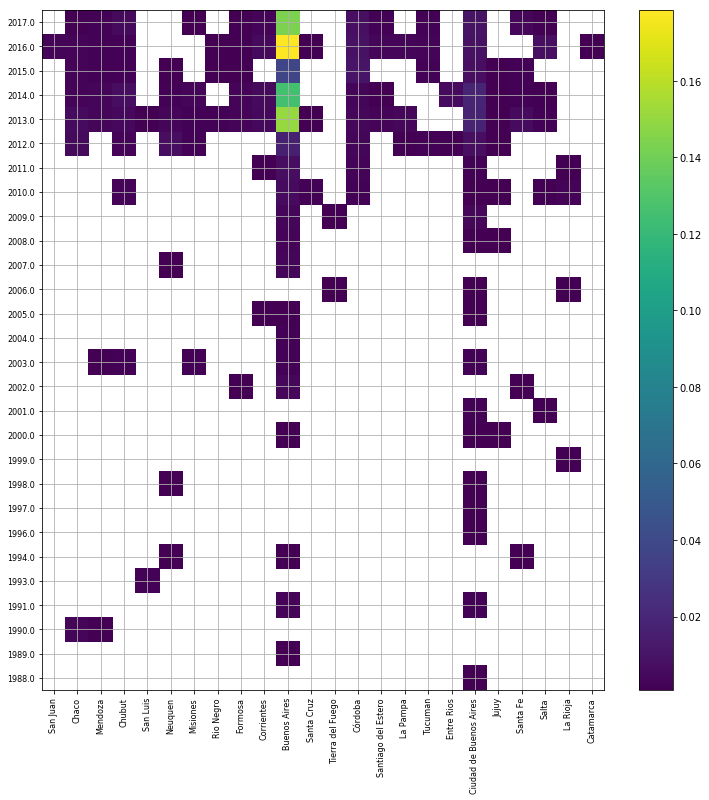

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
fig.subplots_adjust(bottom=0.25,left=0.25) # make room for labels
heatmap = ax.pcolormesh(ypd_NotNaNNorm)
cbar = plt.colorbar(heatmap)
headers=ypd_NotNaNNorm.columns.tolist();

# Set ticks in center of cells
ax.set_xticks(numpy.arange(ypd_NotNaNNorm.shape[1])+0.5, minor=False)
ax.set_yticks(numpy.arange(ypd_NotNaNNorm.shape[0])+0.5, minor=False)

# Rotate the xlabels. Set both x and y labels 
ax.set_xticklabels(headers,rotation=90,fontsize=8)
ax.set_yticklabels(ypd_NotNaNNorm.index,fontsize=8)
ax.grid(True)
plt.show()

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

### Sol Ejercicio 4

In [45]:
# Arreglamos el tema de acentos dentro de los strings, puesto que vamos a usarlos para filtrar
dataset['contexto1']=dataset['contexto1'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# Veamos que componen contexto1
depFullList=list(set(dataset.contexto1.tolist()))
for i in range(0,len(depFullList)):
    print (i,depFullList[i])

(0, nan)
(1, u'Centros de Detencion Previos al Juicio (Alcaidia)')
(2, u'Centros de Detencion Preventiva')
(3, u'Moviles y medios de transporte de Fuerzas de Seguridad')
(4, u'Comisaria')
(5, u'Domicilio Particular')
(6, u'Escuelas de Formacion Fuerzas Provinciales')
(7, u'Espacio Publico')
(8, u'Penal / Complejo Penitenciario PROVINCIAL')
(9, u'Escuelas de Formacion Fuerzas Nacionales')
(10, u'Establecimiento de Salud Mental')
(11, u'Establecimiento de Rehabilitacion de Adicciones')
(12, u'Penal / Complejo Penitenciario FEDERAL')
(13, u'Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)')
(14, u'Centros de Alojamiento para Personas Menores de Edad')
(15, u'Instalaciones de la Gendarmeria Nacional')
(16, u'Hospital General')
(17, u'Lugar No Identificado')


In [65]:
#Armamos la lista para filtrar
reqList=list( depFullList[i] for i in [2, 3, 4,7,8,10,12,14,17])
reqList

[u'Centros de Detencion Preventiva',
 u'Moviles y medios de transporte de Fuerzas de Seguridad',
 u'Comisaria',
 u'Espacio Publico',
 u'Penal / Complejo Penitenciario PROVINCIAL',
 u'Establecimiento de Salud Mental',
 u'Penal / Complejo Penitenciario FEDERAL',
 u'Centros de Alojamiento para Personas Menores de Edad',
 u'Lugar No Identificado']

In [66]:
#Filtramos
pdNew=dataset.loc[dataset['contexto1'].isin(reqList)]
# La cantidad de eventos totales en contexto 1 la sacamos de
Pcp=float(sum(dataset.contexto1.value_counts()))
Pcf=float(pdNew.shape[0])
sout='La probabilidad es: %f' % float(Pcf/Pcp)
print(sout)

La probabilidad es: 0.701805


## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

### Sol Ejercicio 5

In [67]:
fList=list(set(dataset.violencia_fisica.tolist()))
lst=fList[1:]

In [69]:
#Filtramos aquellos con violencia fisica
pvf=dataset.loc[dataset['violencia_fisica'].isin(lst)]
pvf

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
4,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN
5,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Alejamiento de vínculos,NaN,NaN,NaN,Servicio Penitenciario Provincial,NaN,NaN
14,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Hurto / Robo de pertenencias,Golpes,NaN,NaN,"Denegación acceso atención médica, Falta de ad...",NaN,Servicio Penitenciario Provincial,UPP Nº 37 BARKER,NaN
19,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Tránsito,Espacio Público,NaN,NaN,Otras formas de maltrato físico,"Hostigamiento, Amenazas",Violación grupal,NaN,NaN,Servicio Penitenciario Provincial,Comisaria N° 1 de Avellaneda,NaN
20,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Segregación / Confinamiento,Golpes,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP N° 30 de Alvear,NaN
25,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Ciudad de Buenos Aires,Situaciones de Detención,Comisaría,NaN,NaN,"Golpes, Otras formas de maltrato físico",NaN,NaN,NaN,NaN,Policia Federal Argentina (PFA),NaN,NaN
35,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2016,00",Córdoba,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,Hostigamiento,Otras formas de violencia sexual y/o de género,NaN,NaN,Servicio Penitenciario Provincial,Penal de Bouwer,NaN
39,DNPCVI,Otro,Otros,"2017,00",Ciudad de Buenos Aires,Situaciones de Tránsito,Espacio Público,NaN,NaN,Muerte,NaN,NaN,NaN,NaN,Policia Federal Argentina (PFA),NaN,NaN
44,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Otras formas de maltrato físico,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP N° 36 de Magdalena,NaN
49,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Córdoba,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,Golpes,NaN,NaN,Falta de administración de medicación,NaN,Servicio Penitenciario Provincial,Penal de Cruz del Eje,NaN


In [78]:
# Ahora con el dataframe de violencia fisica, contemos aquellos con N:violencia_psiquica
pvf_vp_val=float(sum(pvf.violencia_psiquica.value_counts()))
pvf_val=float(pvf.shape[0])
sout='La probabilidad es: %f' % float(pvf_vp_val/pvf_val)
print(sout)

La probabilidad es: 0.213559
